# 1.Introduction: 
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.
> 
Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

# 2. Types of Clustering
Broadly speaking, clustering can be divided into two subgroups :

* **Hard Clustering:** In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.
* **Soft Clustering:** In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store.

# 3. Types of clustering algorithms
Since the task of clustering is subjective, the means that can be used for achieving this goal are plenty. Every methodology follows a different set of rules for defining the ‘similarity’ among data points. In fact, there are more than 100 clustering algorithms known. But few of the algorithms are used popularly, let’s look at them in detail:

> * **Connectivity models:** As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

> * **Centroid models:** These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.
> 
> * **Distribution models:** These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

> * **Density Models:** These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.Now I will be taking you through two of the most popular clustering algorithms in detail – K Means clustering and Hierarchical clustering. Let’s begin.

# K-mean clustering

## Importing modules

In [1]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#other import 
import seaborn as sns
import matplotlib.pyplot as plt


We will write our code in functions so that it can later be used in .py extention as well as in extention to this notebook.
## Function for loading the data

In [2]:
def load_function():
    return pd.read_csv("../input/forest-cover-type-dataset/covtype.csv") #returning the datframe 

# Basic Analysis

In [3]:
df = load_function();
df.head()



,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


**Remarks:**
* The dataset is large in terms of features.
* It contains 55 columns in total.

### Number of Records

In [4]:
len(df)

581012

### Description

In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Information/summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
#there is no null value
#df.isna().sum()

## New feature

In [8]:
df["Distance_To_Hydrology"] =( (df["Horizontal_Distance_To_Hydrology"] ** 2) + (df["Vertical_Distance_To_Hydrology"] ** 2) ) ** (0.5)

In [9]:
df.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True)

In [10]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Distance_To_Hydrology
0,2596,51,3,510,221,232,148,6279,1,0,...,0,0,0,0,0,0,0,0,5,258.000000
1,2590,56,2,390,220,235,151,6225,1,0,...,0,0,0,0,0,0,0,0,5,212.084889
2,2804,139,9,3180,234,238,135,6121,1,0,...,0,0,0,0,0,0,0,0,2,275.769832
3,2785,155,18,3090,238,238,122,6211,1,0,...,0,0,0,0,0,0,0,0,2,269.235956
4,2595,45,2,391,220,234,150,6172,1,0,...,0,0,0,0,0,0,0,0,5,153.003268


In [11]:
df['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

# One-hot-encoded dataframe

In [12]:
def one_hot_encoder(data):
    return pd.get_dummies(data)

df = one_hot_encoder(df)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,...,Soil_Type39,Soil_Type40,Distance_To_Hydrology,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir
0,2596,51,3,510,221,232,148,6279,1,0,...,0,0,258.000000,1,0,0,0,0,0,0
1,2590,56,2,390,220,235,151,6225,1,0,...,0,0,212.084889,1,0,0,0,0,0,0
2,2804,139,9,3180,234,238,135,6121,1,0,...,0,0,275.769832,0,0,0,0,1,0,0
3,2785,155,18,3090,238,238,122,6211,1,0,...,0,0,269.235956,0,0,0,0,1,0,0
4,2595,45,2,391,220,234,150,6172,1,0,...,0,0,153.003268,1,0,0,0,0,0,0


In [13]:
numerical_dataframe =  df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Distance_To_Hydrology"]]

In [14]:
categorical_dataframe = df[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4","Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40","Cover_Type_Aspen","Cover_Type_Cottonwood/Willow","Cover_Type_Douglas-fir","Cover_Type_Krummholz","Cover_Type_Lodgepole Pine","Cover_Type_Ponderosa Pine","Cover_Type_Spruce/Fir"]]

In [15]:
def standard_numerical_dataframe(data):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(data))

numerical_dataframe = standard_numerical_dataframe(numerical_dataframe)
numerical_dataframe.head()

,0,1,2,3,4,5,6,7,8
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983


In [16]:
numerical_dataframe.columns = ["Elevation_Scaled","Aspect_Scaled","Slope_Scaled","Horizontal_Distance_To_Roadways_Scaled","Hillshade_9am_Scaled","Hillshade_Noon_Scaled","Hillshade_3pm_Scaled","Horizontal_Distance_To_Fire_Points_Scaled","Distance_To_Hydrology_Scaled"]

In [17]:
numerical_dataframe.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983


In [18]:
df = pd.concat([numerical_dataframe, categorical_dataframe], axis=1, join='inner')

In [19]:
df.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,...,0,0,0,1,0,0,0,0,0,0
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,...,0,0,0,0,0,0,0,1,0,0
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,...,0,0,0,1,0,0,0,0,0,0


## Optimal number of cluster

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



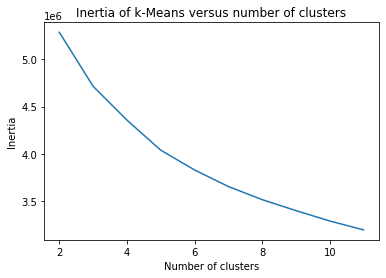

In [20]:

def elbow_plot(data):
    scores = [KMeans(n_clusters=i+2).fit(data).inertia_ 
          for i in range(10)]
    sns.lineplot(np.arange(2, 12), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel("Inertia")
    plt.title("Inertia of k-Means versus number of clusters")

elbow_plot(df)


**Remarks:**

* The optimal number of cluster is 5.


In [21]:
def cluster(data,k=5):
    kmeans = KMeans(n_clusters=k) #Initialize our model
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    data["Cluster"] = clusters
    return data

In [22]:
clustered_df=cluster(df)

In [23]:
clustered_df["Cluster"].describe()

count    581012.000000
mean          2.121104
std           1.166946
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Cluster, dtype: float64

# Visualization of Clustered Dataset

## 1. Principal Component Analysis (PCA)

## Sample the dataset

In [24]:
def sample_dataset(data,data_point):
    sample = pd.DataFrame(np.array(data.sample(data_point)))
    sample.columns = data.columns
    return sample

In [25]:
sample = sample_dataset(clustered_df,10000)

# Principal component datasets

In [26]:
def pca_dataset(n_component,data,cluster_label):
    pca = PCA(n_components=n_component)
    pca_df = pd.DataFrame(pca.fit_transform(data.drop([cluster_label],axis=1)))
    return pca_df

In [27]:
PCs_1d = pca_dataset(1,sample,"Cluster")
PCs_2d = pca_dataset(2,sample,"Cluster")
PCs_3d = pca_dataset(3,sample,"Cluster")

In [28]:
PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [29]:
plot_df = pd.concat([sample,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [30]:
plot_df["dummy"] = 0 #1-D visualization

In [31]:
cluster0 = plot_df[plot_df["Cluster"] == 0]
cluster1 = plot_df[plot_df["Cluster"] == 1]
cluster2 = plot_df[plot_df["Cluster"] == 2]
cluster3 = plot_df[plot_df["Cluster"] == 3]
cluster4 = plot_df[plot_df["Cluster"] == 4]


In [32]:
def pca_visualization(num_of_cluster=5,dimension=1):
    
    trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
    trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
    trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
    trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                    text = None)
    trace5 = go.Scatter(
                    x = cluster4["PC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                    text = None)
    data = [trace1, trace2, trace3, trace4, trace5]

    title = "Visualizing Clusters in One Dimension Using PCA"

    layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

    fig = dict(data = data, layout = layout)

    iplot(fig)
    

In [33]:
pca_visualization()

In [34]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["PC1_2d"],
                y = cluster3["PC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["PC1_2d"],
                y = cluster4["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)
data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [35]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
#trace4 is for 'Cluster 3'
trace4 = go.Scatter3d(
                    x = cluster3["PC1_3d"],
                    y = cluster3["PC2_3d"],
                    z = cluster3["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                    text = None)
#trace5 is for 'Cluster 4'
trace5 = go.Scatter3d(
                    x = cluster4["PC1_3d"],
                    y = cluster4["PC2_3d"],
                    z = cluster4["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## 2.T-SNE

In [36]:
sample = sample_dataset(clustered_df,10000)
#Set our perplexity
perplexity = 50

In [37]:
def tsne_dataset(n_component,data,cluster_label,perplexity):
    tsne = TSNE(n_components=n_component,perplexity=perplexity)
    tsne_df = pd.DataFrame(tsne.fit_transform(data.drop([cluster_label],axis=1)))
    return tsne_df

In [38]:
TCs_1d = tsne_dataset(1,sample,"Cluster",perplexity)
TCs_2d = tsne_dataset(2,sample,"Cluster",perplexity)
TCs_3d = tsne_dataset(3,sample,"Cluster",perplexity)

In [39]:
TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [40]:
tsne_data = pd.concat([sample,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [41]:
tsne_data["dummy"] = 0

In [42]:
cluster0 = tsne_data[tsne_data["Cluster"] == 0]
cluster1 = tsne_data[tsne_data["Cluster"] == 1]
cluster2 = tsne_data[tsne_data["Cluster"] == 2]
cluster3 = tsne_data[tsne_data["Cluster"] == 3]
cluster4 = tsne_data[tsne_data["Cluster"] == 4]

In [43]:
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                    x = cluster3["TC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                    text = None)
trace5 = go.Scatter(
                    x = cluster4["TC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                    text = None)
data = [trace1, trace2, trace3,trace4, trace5]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [44]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["TC1_2d"],
                y = cluster3["TC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["TC1_2d"],
                y = cluster4["TC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)

data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using TSNE"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [45]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
#trace4 is for 'Cluster 3'
trace4 = go.Scatter3d(
                    x = cluster3["TC1_3d"],
                    y = cluster3["TC2_3d"],
                    z = cluster3["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                    text = None)
#trace5 is for 'Cluster 4'
trace5 = go.Scatter3d(
                    x = cluster4["TC1_3d"],
                    y = cluster4["TC2_3d"],
                    z = cluster4["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(0, 0, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3,trace4, trace5]

title = "Visualizing Clusters in Three Dimensions Using TSNE"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# Mini batch Kmean Algorithem

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step,  samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. 

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [47]:
def mini_cluster(data,k=5):
    minikmeans = MiniBatchKMeans(n_clusters=k) #Initialize our model
    minikmeans.fit(data)
    clusters = minikmeans.predict(data)
    data["Cluster"] = clusters
    return data

https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters


In [48]:
mini_cluster_data = mini_cluster(df)
mini_cluster_data.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Soil_Type39,Soil_Type40,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir,Cluster
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,...,0,0,1,0,0,0,0,0,0,2
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,...,0,0,1,0,0,0,0,0,0,2
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,...,0,0,0,0,0,0,1,0,0,2
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,...,0,0,0,0,0,0,1,0,0,2
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,...,0,0,1,0,0,0,0,0,0,2


In [49]:
sample = sample_dataset(mini_cluster_data,5000)

In [50]:
PCs_1d = pca_dataset(1,sample,"Cluster")
PCs_2d = pca_dataset(2,sample,"Cluster")
PCs_3d = pca_dataset(3,sample,"Cluster")

In [51]:
PCs_1d.columns = ["PC1_1d"]
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [52]:
plot_df = pd.concat([sample,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plot_df["dummy"] = 0 #1-D visualization

In [53]:
cluster0 = plot_df[plot_df["Cluster"] == 0]
cluster1 = plot_df[plot_df["Cluster"] == 1]
cluster2 = plot_df[plot_df["Cluster"] == 2]
cluster3 = plot_df[plot_df["Cluster"] == 3]
cluster4 = plot_df[plot_df["Cluster"] == 4]

In [54]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["PC1_2d"],
                y = cluster3["PC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["PC1_2d"],
                y = cluster4["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)
data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [55]:
TCs_1d = tsne_dataset(1,sample,"Cluster",perplexity=50)
TCs_2d = tsne_dataset(2,sample,"Cluster",perplexity=50)
TCs_3d = tsne_dataset(3,sample,"Cluster",perplexity=50)

In [56]:
TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [57]:
tsne_data = pd.concat([sample,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [58]:
tsne_data["dummy"] = 0

In [59]:
cluster0 = tsne_data[tsne_data["Cluster"] == 0]
cluster1 = tsne_data[tsne_data["Cluster"] == 1]
cluster2 = tsne_data[tsne_data["Cluster"] == 2]
cluster3 = tsne_data[tsne_data["Cluster"] == 3]
cluster4 = tsne_data[tsne_data["Cluster"] == 4]

In [60]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["TC1_2d"],
                y = cluster3["TC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["TC1_2d"],
                y = cluster4["TC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)

data = [trace1, trace2, trace3,trace4,trace5]

title = "Visualizing Clusters in Two Dimensions Using TSNE"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# K-mean with spark 

In [61]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 52 kB/s 
     |████████████████████████████████| 198 kB 43.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=ef0b2dc044d78da7749ab89aaf3f2029425ab569e89365f6deced68f8dee5b5d
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [62]:
from pyspark.sql import SparkSession

In [63]:
spark = SparkSession.builder.appName("Kmeans").getOrCreate()

In [64]:
df.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Soil_Type39,Soil_Type40,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir,Cluster
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,...,0,0,1,0,0,0,0,0,0,2
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,...,0,0,1,0,0,0,0,0,0,2
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,...,0,0,0,0,0,0,1,0,0,2
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,...,0,0,0,0,0,0,1,0,0,2
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,...,0,0,1,0,0,0,0,0,0,2


In [65]:
spark_data = spark.createDataFrame(df)
spark_data.show(2)

+-------------------+-------------------+-------------------+--------------------------------------+--------------------+---------------------+--------------------+-----------------------------------------+----------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------------+----------------------------+----------------------+--------------------+-------------------------+-------------------------+---------------------+-------+
|   Elevation_Scaled|      Aspect_Scaled|       Slope

In [66]:
spark_data.printSchema()

root
 |-- Elevation_Scaled: double (nullable = true)
 |-- Aspect_Scaled: double (nullable = true)
 |-- Slope_Scaled: double (nullable = true)
 |-- Horizontal_Distance_To_Roadways_Scaled: double (nullable = true)
 |-- Hillshade_9am_Scaled: double (nullable = true)
 |-- Hillshade_Noon_Scaled: double (nullable = true)
 |-- Hillshade_3pm_Scaled: double (nullable = true)
 |-- Horizontal_Distance_To_Fire_Points_Scaled: double (nullable = true)
 |-- Distance_To_Hydrology_Scaled: double (nullable = true)
 |-- Wilderness_Area1: long (nullable = true)
 |-- Wilderness_Area2: long (nullable = true)
 |-- Wilderness_Area3: long (nullable = true)
 |-- Wilderness_Area4: long (nullable = true)
 |-- Soil_Type1: long (nullable = true)
 |-- Soil_Type2: long (nullable = true)
 |-- Soil_Type3: long (nullable = true)
 |-- Soil_Type4: long (nullable = true)
 |-- Soil_Type5: long (nullable = true)
 |-- Soil_Type6: long (nullable = true)
 |-- Soil_Type7: long (nullable = true)
 |-- Soil_Type8: long (nullable = 

In [67]:
from pyspark.ml.feature import VectorAssembler
columns=spark_data.columns

In [68]:
assemble=VectorAssembler(inputCols=columns,outputCol="features")
assembled_data = assemble.transform(spark_data)
assembled_data.show(2)

+-------------------+-------------------+-------------------+--------------------------------------+--------------------+---------------------+--------------------+-----------------------------------------+----------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------------+----------------------------+----------------------+--------------------+-------------------------+-------------------------+---------------------+-------+--------------------+
|   Elevation_Scaled|      Aspec

In [69]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='features', k=i)
    
    KMeans_fit=KMeans_algo.fit(assembled_data)
    
    output=KMeans_fit.transform(assembled_data)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.4294008647337585
Silhouette Score: 0.40726020589908146
Silhouette Score: 0.3183482187933539
Silhouette Score: 0.3661024836555275
Silhouette Score: 0.32073495748679665
Silhouette Score: 0.312796165474876
Silhouette Score: 0.2712367893481873
Silhouette Score: 0.25612403563505926


Text(0, 0.5, 'cost')

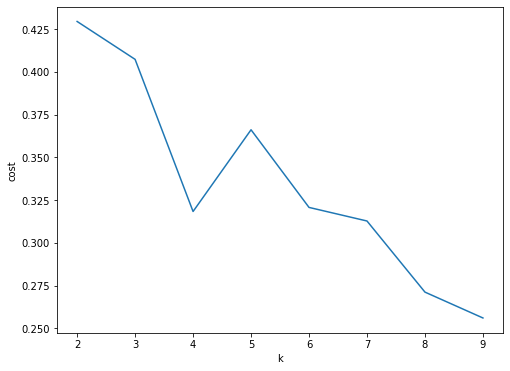

In [70]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [71]:
k = 6
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(assembled_data)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 2.41457934e-01 -3.95515750e-01 -5.60884359e-01  1.22879083e+00
  3.87874313e-01  2.21268640e-01 -1.20334555e-01  1.18124043e+00
 -6.20467989e-02  9.63847185e-01  1.07517335e-02  2.54010814e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  9.32231229e-04
  1.58035389e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.35422123e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.23587226e-02  0.00000000e+00  7.95503982e-03  1.80764074e-02
  3.86742784e-02  0.00000000e+00  6.73337299e-02  1.06620617e-01
  1.40900091e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.50827022e-01  8.65110580e-02  2.39716602e-04
  1.06540712e-03  5.85973915e-03  0.00000000e+00  1.04765033e-03
  0.00000000e+00  1.13643426e-03  2.66795699e-02  1.22255467e-02
  1.13643426e-02  3.84434402e-03  0.00000000e+00  0.00000000e+00
  3.38888248e-02  5.64896611e-01  0.00000000e+00  3.97370220e-01
  2.000

In [72]:
transformed = model.transform(assembled_data)
#rows = transformed.collect().
#print(rows[:3])
#print(type(rows))


In [73]:
df_spark = transformed.toPandas()
df_spark.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir,Cluster,features,prediction
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,...,1,0,0,0,0,0,0,2,"(-1.2978050900447733, -0.9351569812768747, -1....",0
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,...,1,0,0,0,0,0,0,2,"(-1.3192348482759493, -0.8904796686290767, -1....",0
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,...,0,0,0,0,1,0,0,2,"(-0.5549068046973424, -0.14883627867562918, -0...",0
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,...,0,0,0,0,1,0,0,2,"(-0.6227677057627328, -0.005868878202675442, 0...",0
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,...,1,0,0,0,0,0,0,2,"(-1.3013767164166359, -0.9887697564542325, -1....",0


In [74]:
df_spark["Cluster"]=df_spark["prediction"]
df_spark.drop(["prediction"],axis=1,inplace=True)
df_spark.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Soil_Type40,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir,Cluster,features
0,-1.297805,-0.935157,-1.482820,-1.180146,0.330743,0.439143,0.142960,3.246283,-0.083233,1,...,0,1,0,0,0,0,0,0,0,"(-1.2978050900447733, -0.9351569812768747, -1...."
1,-1.319235,-0.890480,-1.616363,-1.257106,0.293388,0.590899,0.221342,3.205504,-0.294777,1,...,0,1,0,0,0,0,0,0,0,"(-1.3192348482759493, -0.8904796686290767, -1...."
2,-0.554907,-0.148836,-0.681563,0.532212,0.816364,0.742654,-0.196691,3.126965,-0.001362,1,...,0,0,0,0,0,1,0,0,0,"(-0.5549068046973424, -0.14883627867562918, -0..."
3,-0.622768,-0.005869,0.520322,0.474492,0.965786,0.742654,-0.536343,3.194931,-0.031466,1,...,0,0,0,0,0,1,0,0,0,"(-0.6227677057627328, -0.005868878202675442, 0..."
4,-1.301377,-0.988770,-1.616363,-1.256464,0.293388,0.540313,0.195215,3.165479,-0.566983,1,...,0,1,0,0,0,0,0,0,0,"(-1.3013767164166359, -0.9887697564542325, -1...."


In [75]:
df_spark.drop("features",axis=1,inplace=True)

In [76]:
sample = sample_dataset(df_spark,10000)

In [77]:
PCs_2d = pca_dataset(2,sample,"Cluster")
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plot_df = pd.concat([sample,PCs_2d], axis=1, join='inner')

In [78]:
cluster0 = plot_df[plot_df["Cluster"] == 0]
cluster1 = plot_df[plot_df["Cluster"] == 1]
cluster2 = plot_df[plot_df["Cluster"] == 2]
cluster3 = plot_df[plot_df["Cluster"] == 3]
cluster4 = plot_df[plot_df["Cluster"] == 4]
cluster5 = plot_df[plot_df["Cluster"] == 5]

In [79]:
cluster3.head()

,Elevation_Scaled,Aspect_Scaled,Slope_Scaled,Horizontal_Distance_To_Roadways_Scaled,Hillshade_9am_Scaled,Hillshade_Noon_Scaled,Hillshade_3pm_Scaled,Horizontal_Distance_To_Fire_Points_Scaled,Distance_To_Hydrology_Scaled,Wilderness_Area1,...,Cover_Type_Aspen,Cover_Type_Cottonwood/Willow,Cover_Type_Douglas-fir,Cover_Type_Krummholz,Cover_Type_Lodgepole Pine,Cover_Type_Ponderosa Pine,Cover_Type_Spruce/Fir,Cluster,PC1_2d,PC2_2d
11,-2.194283,1.289773,3.191179,-1.003779,-4.450753,-1.432504,2.259252,-0.306822,-0.132720,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.402836,5.046814
19,-3.258628,1.593579,1.588665,-1.353306,-2.209426,-1.331334,0.926772,-1.237199,-0.841039,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.756303,4.672534
36,-2.312147,0.601743,2.924093,-0.513160,-2.246782,1.147334,1.710584,-0.883021,-0.812823,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.600559,3.395040
47,-1.533532,0.503452,2.122836,-0.842805,-1.200830,1.400260,1.240297,-0.572644,-0.332478,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.930079,2.319774
64,-3.272914,0.825129,2.790550,-1.394992,-3.292734,0.793239,2.442142,-1.237199,-0.777300,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.477054,4.664310


In [80]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["PC1_2d"],
                y = cluster3["PC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["PC1_2d"],
                y = cluster4["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)
trace6 = go.Scatter(
                x = cluster5["PC1_2d"],
                y = cluster5["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(100, 100, 100, 0.8)'),
                text = None)
data = [trace1, trace2, trace3,trace4,trace5,trace6]
title = "Visualizing Clusters in Two Dimensions Using PCA"
layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [81]:
PCs_2d = pca_dataset(2,sample,"Cluster")
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plot_df = pd.concat([sample,PCs_2d], axis=1, join='inner')

In [82]:
cluster0 = plot_df[plot_df["Cluster"] == 0]
cluster1 = plot_df[plot_df["Cluster"] == 1]
cluster2 = plot_df[plot_df["Cluster"] == 2]
cluster3 = plot_df[plot_df["Cluster"] == 3]
cluster4 = plot_df[plot_df["Cluster"] == 4]
cluster5 = plot_df[plot_df["Cluster"] == 5]

In [83]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)
#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                x = cluster3["PC1_2d"],
                y = cluster3["PC2_2d"],
                mode = "markers",
                name = "Cluster 3",
                marker = dict(color = 'rgba(255, 25, 200, 0.8)'),
                text = None)
trace5 = go.Scatter(
                x = cluster4["PC1_2d"],
                y = cluster4["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(0, 255, 2, 0.8)'),
                text = None)
trace6 = go.Scatter(
                x = cluster5["PC1_2d"],
                y = cluster5["PC2_2d"],
                mode = "markers",
                name = "Cluster 4",
                marker = dict(color = 'rgba(100, 100, 100, 0.8)'),
                text = None)
data = [trace1, trace2, trace3,trace4,trace5,trace6]
title = "Visualizing Clusters in Two Dimensions Using PCA"
layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [84]:
PCs_2d = pca_dataset(2,sample,"Cluster")
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
plot_df = pd.concat([sample,PCs_2d], axis=1, join='inner')